# Lecture 2: Classes, Numpy and Matplotlib

## Lecture Goals

- Build your own **classes**; create a class for an Array using native Python capabilities.

- Learn basic advantages and uses of **Numpy**, so you can complete exercises.

- Learn how to plot results in **Matplotlib**.

# Classes

Python is an **object-oriented programming language** (OOP), which means it is based on the concept of **objects**, which can contain data, in the form of fields, also known as **attributes** or properties, and code in the form of procedures or **methods**.

Learning about OOP requires knowledge of new vocabulary, which will be introduced step-by-step as you go through this notebook.

Some of the examples used in this notebook were taken from this website, which also includes a glossary of terms near the bottom: http://openbookproject.net/thinkcs/python/english3e/classes_and_objects_I.html

**Classes** are the most fundamental building block of Python. Understanding what classes are, when to use them, and how they can be useful are essential for many advanced programming applications.  Classes can be thought of as blueprints for creating objects.


Python has many predefined classes that we have already learned about: lists, tuples, dictionaries, strings, sets, and numpy arrays.  Each **instance** of a class is an **object**, and the class defines methods (functions written with parentheses) and attributes that can operate on that instance, written in python as:

class.method()

class.attribute

Python has many native class methods, here are some examples from the string class.

In [1]:
s = 'where do we go next?'

In [2]:
s.upper()

'WHERE DO WE GO NEXT?'

In [3]:
s.replace("next", "now")

'where do we go now?'

I'm glad you asked! Now we will make our first class, with a docstring, attribute and method:

In [4]:
class MyClass:
    """A simple example class"""
    i = 1245
    def f(self):
        return "hello from the inside"

Notice that there is a header that begins with the keyword **class**, followed by the name of the class, and ending with a colon (:).  Indentation alway tells us where the class ends.  The docstring is surrounded by three quotations marks.

In [5]:
m = MyClass()

m will become and **instance** of MyClass

In [6]:
m.__doc__ # Show the documentation of MyClass
# m?

'A simple example class'

In [7]:
m?

In [8]:
m.i # attributes are called without parentheses

1245

In [9]:
m.f() # functions are called with parentheses

'hello from the inside'

Like function definitions using 'def', classes are defined with 'class'.  Classes are a logical grouping of data and functions (known as methods when in classes).  Classes help us organize code and data by defining logical connections between things we are analyzing.

# Self

One special thing about methods is that the instance object is passed as the first argument of the function, and here it is denoted as **self**. The **self** parameter is automatically set to reference the newly created object that needs to be initialized.  In our example, the call m.f() is exactly equivalent to MyClass.f(m).

In [10]:
MyClass.f(m)

'hello from the inside'

In [11]:
m.f() # m is the instance, referred to as self when we call the function f()

'hello from the inside'

# <verbatim>\_\_init\_\_</verbatim>()

When __initializing__ a new instance, it can be useful to has specific initial conditions.  This can be done with a special **initializer** method named <verbatim>\_\_init\_\_</verbatim>() :

In [12]:
class Complex:
    def __init__(self, real, imag):
        self.r = real
        self.i = imag

x = Complex(2.0, -6)
x.r, x.i

(2.0, -6)

The <verbatim>\_\_init\_\_</verbatim>() method may have arguments for greater flexibility, and these arguments must be given to the class instantiation operator.  The initializer method is automatically called whenever a new instance of Complex is created.

Every class should have a method with the special name <verbatim>\_\_init\_\_</verbatim>(). It gives you the chance to set up attributes needed for every new instance by giving them inital values.

Now, let's create a **Point** class.

In [13]:
class Point:
    """ Point class represents and manipulates x,y coords. """

    def __init__(self):
        """ Create a new point at the origin """
        self.x = 0
        self.y = 0

Now let's use our Point class.

In [14]:
p = Point()         # Instantiate an object of type Point
q = Point()         # Make a second point

print(p.x, p.y, q.x, q.y)  # Each point object has its own x and y

0 0 0 0


During the initialization, we crated two attributes, x and y for each object, p and q, and gave them both the value of 0.

A function like Point that creates a new object is called a **constructor**, and every class automatically provides a constructor function which is named the same as the class.

**Factory metaphor:** It can be useful to think of a class as a factory for making objects.  The class itself isn't an instance of a point, but it contains the machinery to make point instances.  Every time we call the constructor, we're telling the factory to make us a new object.  When the object is being made, its initialization method is executed to get the object properly set up with its factory default settings.

**Instantiation** is the combined process of "make a new object" and set up its default factory settings.

Like real-world objects, object instances have both attributes and methods.  We can modify the attributes in an instance using dot notation.

In [15]:
p.x = 3
p.y = 4

In [16]:
print(p.x, p.y)

3 4


Instead of changing the attributes after creating each instance, we can add them to the <verbatim>\_\_init\_\_</verbatim>() method:

In [17]:
class Point:
    """ Point class represents and manipulates x,y coords. """

    def __init__(self, x=0, y=0):
        """ Create a new point at x, y """
        self.x = x
        self.y = y

The x and y parameters are both optional.  If the caller does not supply arguments, they'll get the default values of 0.  Here is our improved class in action:

In [18]:
p = Point(5, 2)
q = Point(3, 4)
r = Point()
print(p.x, q.x, r.x)

5 3 0


# Adding methods to classes

The key advantage of using a class like Point rather than a simple tuple is so that you can add specific methods to your class that might not be appropriate for all tuples, that instead might represent a date.

Creating classes allows you to organize both your code and your thinking better.

A **method** behaves like a function that is invoked on a specific instance.  Below we add the method, **distance_from_origin** to understand better how the work.

In [19]:
class Point:
    """ Create a new Point, at coordinates x, y """

    def __init__(self, x=0, y=0):
        """ Create a new point at x, y """
        self.x = x
        self.y = y

    def distance_from_origin(self):
        """ Compute my distance from the origin """
        return ((self.x ** 2) + (self.y ** 2)) ** 0.5

Since we modified the class, we need to recreate our old instances so they have the new method.

In [20]:
p = Point(5, 2)
q = Point(3, 4)
r = Point()

In [21]:
p.distance_from_origin()

5.385164807134504

In [22]:
q.distance_from_origin()

5.0

In [23]:
r.distance_from_origin()

0.0

Note that we do not need to specify self when calling the function, this is done automatically.

# Converting an instance to a string

Let's see what our Point looks like

In [24]:
print(p)

This doesn't really give us anything useful, but let's take control of the print function.

You can add a method to a class that will use the keyword print by naming the function <verbatim>\_\_str\_\_</verbatim>.

In [25]:
class Point:
    """ Create a new Point, at coordinates x, y """

    def __init__(self, x=0, y=0):
        """ Create a new point at x, y """
        self.x = x
        self.y = y
        
    def __str__(self):    # All we have done is rename the method
        return "Point at ({0}, {1})".format(self.x, self.y)

    def distance_from_origin(self):
        """ Compute my distance from the origin """
        return ((self.x ** 2) + (self.y ** 2)) ** 0.5

In [26]:
w = Point(2,4)
print(w)

Point at (2, 4)


The double underscores before and after methods signify "magic methods."  <verbatim>\_\_init\_\_</verbatim>() was the first one, and now we see <verbatim>\_\_str\_\_</verbatim>(), which is used anytime you want to use the print keyword.  We will make use of magic methods in the rest of the notebook, and you can find a list of them here:

https://www.python-course.eu/python3_magic_methods.php

# Exercise 1

Add a method reflect_x() to Point which returns a new Point that is reflected about the x-axis.  Point(4,6).reflect_x() is (4, -6) 

In [57]:
class Point:
    """ Create a new Point, at coordinates x, y """

    def __init__(self, x=0, y=0):
        """ Create a new point at x, y """
        self.x = x
        self.y = y
        
    def __str__(self):    # All we have done is rename the method
        return "Point at ({0}, {1})".format(self.x, self.y)

    def distance_from_origin(self):
        """ Compute my distance from the origin """
        return ((self.x ** 2) + (self.y ** 2)) ** 0.5
    
    def reflect_x(self):
        return Point(self.x, -self.y)

In [58]:
# This cell should return "Point at (4, -6)"
w = Point(4, 6).reflect_x()
print(w)

Point at (4, -6)


# Magic methods for using the + sign

In this example, we will use another magic method that takes control of the addition (+) sign.

In [29]:
class person:
    def __init__(self, name, age, sex):
        self.name = name
        self.age = age
        if sex == ("boy" or "girl"):
            self.sex = sex
        else:
            print("Must be a boy or girl")
        
    def __str__(self):
        if self.age < 18:
            return "{} is a {} year old {}".format(self.name, self.age, self.sex)
        else:
            sex_dict = {"boy" : "man", "girl" : "woman"}
            self.sex = sex_dict[self.sex]
            return "{} is a {} year old {}".format(self.name, self.age, self.sex)
        
    def __add__(self, years):
        self.age += years

In [30]:
jim = person("Jim",1,"boy")

In [31]:
print(jim)

Jim is a 1 year old boy


In [32]:
jim+17

In [33]:
print(jim)

Jim is a 18 year old man


# Class and Instance Variables

Instance variables: Data unique to each instance

Class variables: Attributes and methods shared by all instances of the class

In [34]:
class Dog:
    # Class variable shared by all instances
    kind = 'canine'     
    
    def __init__(self, name, age):
        # Instances variable unique to each instance
        self.name = name 
        self.age = age

In [35]:
d = Dog('Kaiser', 11)
e = Dog('Conan', 2)

In [36]:
d.kind

'canine'

In [37]:
e.kind

'canine'

In [38]:
d.name, d.age

('Kaiser', 11)

In [39]:
e.name, e.age

('Conan', 2)

# Exercise 2

Now imagine that we try to teach both of our dogs 2 tricks, to shake and to roll over.  Unfortunately, only Conan learns how to do them but Kaiser doesn't.

In [61]:
class Dog:
    # Class variable shared by all instances
    kind = 'canine'  
#     tricks = []
    
    def __init__(self, name, age):
        # Instances variable unique to each instance
        self.name = name 
        self.age = age
        self.tricks = []
        
    def add_trick(self, trick):
        self.tricks.append(trick)
    
k = Dog('Kaiser', 11)
c = Dog('Conan', 2)
c.add_trick('roll over')
c.add_trick('play dead')
print( k.tricks, c.tricks )

[] ['roll over', 'play dead']


But when we run this code, it seems that Kaiser has learned the tricks?! What can we do to fix this code?

# Inheritence

Inheritence (also known as subclassing) allows classes to share the same attributes and methods from a parent or superclass.  Inheritence is done by writing Child(Parent) where the child (subclass) will inherit from its parent (superclass)

In [41]:
class Animal:
    legs = 0
    
    def __init__(self, name):
        self.name = name
        
class Dog(Animal):
    legs = 4
        
    def sound(self):
        return "wuf wuf"
        
Snow = Dog("Snow")
print(Snow.sound(), Snow.legs, Snow.name)

wuf wuf 4 Snow


# Exercise 3

Now imagine that you are creating a group of animals and you want to have a duck, cat and monkey.  Create a new subclass for each animal type and then create your own instance of each animal that makes a sound.

In [62]:
class Animal:
    legs = 0
    
    def __init__(self, name):
        self.name = name
        
class Dog(Animal):
    legs = 4
    def sound(self):
        return "wuf wuf"
    
class Duck(Animal):
    legs = 2
    def sound(self):
        return "quack quack"

class Cat(Animal):
    legs = 4
    def sound(self):
        return "meow"

class Monkey(Animal):
    legs = 2
    def sound(self):
        return "ooh ooh ah ah"

Webb = Duck("Webb")
print(Webb.sound())

Hobbs = Cat("Hobbs")
print(Hobbs.sound())

Koko = Monkey("Koko")
print(Koko.sound())

quack quack
meow
ooh ooh ah ah


# Exercise 4

The final exercise is a multi-step problem, that requires you to combine much of what you've learned throughout this notebook.  Let's try to define a Vector class for 3-dimensional vectors (x,y,z)

In [63]:
class Vector:
    def __init__(self, x=0, y=0,z=0):
        self.x = x
        self.y = y
        self.z = z
    def __str__(self):
        return 'Vector ({0:.2f}, {1:.2f}, {2:.2f})'.format(self.x,self.y,self.z)

Here we use the magic method <verbatim>\_\_str\_\_</verbatim> , which returns a representation of the object

In [64]:
v1 = Vector(2,7,4)
v2 = Vector(6,3,1)

In [65]:
print(v1)

Vector (2.00, 7.00, 4.00)


In [66]:
print(v1+v2)

TypeError: unsupported operand type(s) for +: 'Vector' and 'Vector'

## Exercise 4 a
How could we add a method to our class to make this work? We already used the appropriate magic method in a previous example.

In [67]:
class Vector:
    def __init__(self, x=0, y=0,z=0):
        self.x = x
        self.y = y
        self.z = z
    def __str__(self):
        return 'Vector ({0:.2f}, {1:.2f}, {2:.2f})'.format(self.x,self.y,self.z)
    def __add__(self,other):
        return Vector(self.x + other.x, self.y + other.y, self.z+other.z)

In [68]:
v1 = Vector(2,7,4)
v2 = Vector(6,3,1)
print(v1+v2) # Should output Vector (8.00, 10.00, 5.00)

Vector (8.00, 10.00, 5.00)


## Exercise 4 b
Now define the cross product of two vectors, using the magic method for the multiplication sign (*) named <verbatim>\_\_mul\_\_</verbatim>.

The cross product is given by this forumula:

$$
\begin{pmatrix} x_1\\x_2\\x_3\end{pmatrix} \times \begin{pmatrix} y_1\\y_2\\y_3\end{pmatrix}=
\begin{pmatrix} 
x_2 y_3 - x_3 y_2\\
x_3 y_1 - x_1 y_3\\
x_1 y_2 - x_2 y_1
\end{pmatrix}
$$

In [49]:
class Vector:
    def __init__(self, x=0, y=0,z=0):
        self.x = x
        self.y = y
        self.z = z
    def __str__(self):
        return 'Vector ({0:.2f}, {1:.2f}, {2:.2f})'.format(self.x,self.y,self.z)
    def __add__(self,other):
        return Vector(self.x + other.x, self.y + other.y,self.z+other.z)
    def __mul__(self, other):
        return Vector(self.y * other.z-self.z*other.y, self.z*other.x-self.x*other.z, self.x*other.y-self.y*other.x)

In [50]:
v1 = Vector(2,7,4)
v2 = Vector(6,3,1)
print(v1*v2) # Should return Vector (-5.00, 22.00, -36.00)

Vector (-5.00, 22.00, -36.00)


## Exercise 4 c
Compute the length of a vector as (call your method "norm", this is NOT a magic method)

$$\left|\left| \begin{pmatrix} x\\y\\ z\\\end{pmatrix} \right| \right| = \sqrt{x^2+y^2 + z^2} $$

In [51]:
class Vector:
    def __init__(self, x=0, y=0,z=0):
        self.x = x
        self.y = y
        self.z = z
    def __str__(self):
        return 'Vector (%f, %f, %f)' % (self.x,self.y,self.z)
    def __add__(self,other):
        return Vector(self.x + other.x, self.y + other.y,self.z+other.z)
    def __mul__(self, other):
        return Vector(-self.y * other.z+self.z*other.y, self.z*other.x-self.x*other.z, -self.y *other.x+self.x*other.y)
    def norm(self):
        return (self.x*self.x +self.y*self.y+self.z*self.z)**0.5

In [52]:
v1 = Vector(2,10,1)
v2 = Vector(5,-2,-1)
v3 = Vector(5,2,1)
print(v1.norm(), v2.norm(), v3.norm()) 
# should return 10.246950765959598 5.477225575051661 5.477225575051661

10.246950765959598 5.477225575051661 5.477225575051661


## Exercise 4 d
Which vector has the largest norm? Use <verbatim>\_\_gt\_\_()</verbatim> to implement a comparision of the norms

In [69]:
class Vector:
    def __init__(self, x=0, y=0,z=0):
        self.x = x
        self.y = y
        self.z = z
    def __str__(self):
        return 'Vector (%f, %f, %f)' % (self.x,self.y,self.z)
    def __add__(self,other):
        return Vector(self.x + other.x, self.y + other.y,self.z+other.z)
    def __sub__(self,other):
        return Vector(self.x -other.x, self.y - other.y,self.z-other.z)
    def __mul__(self, other):
        return Vector(-self.y * other.z+self.z*other.y, self.z*other.x-self.x*other.z, -self.y *other.x+self.x*other.y)
    def norm(self):
        return (self.x*self.x +self.y*self.y+self.z*self.z)**0.5
    def __gt__(self,other):
        norm_a=self.norm()
        norm_b=other.norm()
        if (norm_a > norm_b):
            return True
        else:
            return False

In [70]:
v1 = Vector(2,10,1)
v2 = Vector(5,-2,-1)
v3= Vector(5,2,1)
print(v1.norm(), v2.norm())
v1 > v2
# Should return 10.246950765959598 5.477225575051661 and True

10.246950765959598 5.477225575051661


True

# Closing Remarks on Classes

This final exercise requires you to make extensive use of class methods and use some new magic methods on your own.  The Vector class that you programmed is a nice exercise, but for real programming, we will stick with NumPy since its developers have already implemented an extensive library of methods.

The exercises in this notebook were designed to introduce you to **Object-Oriented Programming**.  This is a powerful way to design and reuse code, and when used properly, it can not only help your better organize your code, but it can also help you organize the way you think about code and how you develop it in the future.

# Introduction to Numpy

Many of the examples used in this section were taken from: https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html

The Ultimate Beginner's Guide to NumPy: https://towardsdatascience.com/the-ultimate-beginners-guide-to-numpy-f5a2f99aef54

These websites can be visite before, during or after working with this notebook and will help to explain and reinforce the important concepts related to NumPy.



# Modules and Packages

Much of the functionality and versatility of Python comes in the form of modules (collections of classes and methods) that you can import.

If someone saves a text file with Python code in it and gives it the ".py" file extension, you can run that file in your own session using the **import** statement. If that file contained functions or new classes, then we get to use them!
  - A **Module** is one Python file.
  - A **Package** is a collection of Python files.
  


In [1]:
import math
import numpy
print(math.sqrt)
print(numpy.sqrt)

<built-in function sqrt>
<ufunc 'sqrt'>


In [2]:
dir(math)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'pi',
 'pow',
 'radians',
 'remainder',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'tau',
 'trunc']

In [3]:
dir(numpy)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__mkl_version__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_arg',
 '

# Numpy

NumPy is a Python package that stands for "Numerical Python".  It is a library that makes heavy use of multidimensional array objects and contains a set of routines for processing arrays. 

Using NumPy, you can perform these types of operations:
    - Mathematical and logical operations on arrays.
    - Fourier transforms and routines for shape manipulation.
    - Operations related to linear algebra. NumPy has in-built functions for linear 
      algebra and random number generation (that you used for generating fractals)
      
NumPy is a package for creating, transforming, and calculation with Arrays and Matrices. **It is the most essential package of the entire Python scientific library.**

The more familiar you are with NumPy, the more effective you will be during data analysis.

## Numpy as a Matlab replacement

NumPy is typically used with other packages, like SciPy (Scientific Python) and Matplotlib. This combination is widely used as a free replacement for Matlab, a popular programming language, especially in the Neuroscience community.  Since Python is a general programming language, it has more flexibility compared to Matlab.  

For anyone who has used Matlab in the past or is interested in learning more details about their similiarities and differences, you will find this page very informative:

https://numpy.org/doc/stable/user/numpy-for-matlab-users.html

## The "Import" Statement, Dot Notation, and Namespaces
To keep from overwriting other functions that may have the same name, Python lets us use the Dot to tell it which packages' function we want to use.  What comes before the dot (or whether a dot is even needed) is referred to as an object's **Namespace**.

## "From" lets you bring modules and functions into other namespaces. 

In [4]:
from math import sqrt
# from numpy import sqrt
sqrt

<function math.sqrt(x, /)>

# Bring all the function definitions into the main name space with *

In [5]:
from numpy import *
# from math import *
sin?

Different modules might define functions with the same name, and then these might conflict. For instance, both the math and the numpy module define a function called sin()

**Warning:** When importing all functions like this, functions will be overwritten in the namespace and only the most recently imported function will be active.

It is usually best to assign a very short alias to avoid any possible confusion!

## Preferred Method for Importing: The "as" operater lets you assign a different variable name in the import statement

If numpy is too long to write every time, we can use the alias 

In [2]:
import math as m
import numpy as np

## Import Submodules with the Dot notation and "as"

In [7]:
import numpy.linalg as linalg
import numpy.random as rdm

In [8]:
rdm # press Tab after the dot (.) and start typing to see possible inputs.

<module 'numpy.random' from '/home/dustin/anaconda3/lib/python3.7/site-packages/numpy/random/__init__.py'>

In [9]:
a = 10 - 5*rdm.random(2); print(a)

[5.76659681 5.46009922]


In [10]:
# Get help with a question mark before or after the function. Uncomment each line individually:

# help(rdm.random)
# ?rdm.random
# rdm.random?

# Return random floats in the half-open interval [0.0, 1.0)

In [11]:
np.sin(a)

array([-0.49391669, -0.73324774])

a is a list, and becomes a numpy array when it is passed to the sin function.

In [12]:
m.sin(a)

TypeError: only size-1 arrays can be converted to Python scalars

Numpy is advantageous because it performs operations directly on arrays, unlike math

## NumPy Array Objects

To construct a **numpy.array**, you should give it an **Iterable**.  It will guess what data type you want, but this can be set with the **dtype** **keyword argument**:

In [13]:
a_array = np.array([1, 2, 3, 4])
a_array # But do we want integers?

array([1, 2, 3, 4])

In [14]:
a_float_array = np.array([1, 2, 3, 4], dtype=float)
a_float_array

array([1., 2., 3., 4.])

In [15]:
list1 = ['a', 1, 3.14, 5+2j]
list1

['a', 1, 3.14, (5+2j)]

In [16]:
np.array(list1)

array(['a', '1', '3.14', '(5+2j)'], dtype='<U6')

U6 datatype is a unicode string of 6-character length.  Since we had multiple datatypes, Numpy defaulted to strings so all data could be preserved.  If we remove a, we still can't make everything a float or int because of the complex number

In [17]:
list2 = [1 ,3.14, 5+2j]
np.array(list2) # , dtype=complex)
# np.array(list2).dtype

array([1.  +0.j, 3.14+0.j, 5.  +2.j])

Now let's see what happens when we use floating point numbers and integers

In [18]:
list3 = [1, 5, 3.4, 9.6, 0.9, 5]
np.array(list3) #.dtype

array([1. , 5. , 3.4, 9.6, 0.9, 5. ])

If we check the datatype above, we see it was defaulted to float because it is more precise than integers.  If we want to lose precision and round all numbers down, we can set the dtype=int

In [19]:
np.array(list3, dtype=int)

array([1, 5, 3, 9, 0, 5])

## Limitations Of NumPy Arrays
NumPy Arrays are:
  - Fixed-Length (appending them means making a copy)
  - Fixed-Data Type (only one data type in an array)

Although lists can have multiple datatypes, arrays are more efficient for numerical calculations because they are a single datatype.  We trade versatility for efficiency.

Finally, unlike lists, NumPy arrays can be explicity multidimensional:

In [20]:
np.array([range(i, i + 4) for i in [2, 6, 10]])

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13]])

Input a set of lists inside a larger list to create a 2D array.  The inner lists are treated as rows of the resulting array.

In [21]:
d = np.array([[ 2,  3,  4,  5],[ 6,  7,  8,  9], [10, 11, 12, 13]])
d #.shape is (rows, columns) = (3, 4)

array([[ 2,  3,  4,  5],
       [ 6,  7,  8,  9],
       [10, 11, 12, 13]])

## Array Arithmetic: Now Easy!

By default, all operations are performed **Element-Wise**

In [22]:
data = np.array(range(10), dtype=float)
data

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [23]:
data * 2

array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.])

In [24]:
data * data

array([ 0.,  1.,  4.,  9., 16., 25., 36., 49., 64., 81.])

## Array Arithmetic: Now Fast (on large datasets)!

In [25]:
data = np.array(range(3))
%timeit [el ** 2 for el in data]

1.64 µs ± 16.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [26]:
%timeit data ** 2

701 ns ± 18.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Arrays Can Be Indexed and Sliced, Just like Tuples and Lists

In [27]:
data = np.array(range(10), dtype=float)
data

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [28]:
data[3]

3.0

In [29]:
data[:5]

array([0., 1., 2., 3., 4.])

## Logical Indexing: Using Bool arrays to filter an array

In [30]:
data = np.array(range(4, 20))
mask = data > 11
dd = data[mask]
np.c_[data,mask] # Translates slice objects to concatenation along the second axis.

array([[ 4,  0],
       [ 5,  0],
       [ 6,  0],
       [ 7,  0],
       [ 8,  0],
       [ 9,  0],
       [10,  0],
       [11,  0],
       [12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  1],
       [19,  1]])

In [31]:
dd

array([12, 13, 14, 15, 16, 17, 18, 19])

## Fancy Indexing: Indexing with a list of indices

In [32]:
data[[3, 5, 9]]

array([ 7,  9, 13])

## NumPy comes with Lots of useful math functions!

In [33]:
len(data)

16

In [34]:
np.mean(data)

11.5

In [35]:
np.max(data)

19

In [36]:
np.min(data)

4

In [37]:
np.sum(data)

184

You can see a list of many Numpy functions:
    http://docs.scipy.org/doc/numpy/reference/routines.math.html

## Some Array-Creation Shortcut Functions

There is a numpy extension of the range command.

In [38]:
np.arange(10, 20, 2)

array([10, 12, 14, 16, 18])

In contrast to the range() command, the arguments to arange can be floating point numbers

In [39]:
a = np.arange(1.4, 10., 0.23); print(a)

[1.4  1.63 1.86 2.09 2.32 2.55 2.78 3.01 3.24 3.47 3.7  3.93 4.16 4.39
 4.62 4.85 5.08 5.31 5.54 5.77 6.   6.23 6.46 6.69 6.92 7.15 7.38 7.61
 7.84 8.07 8.3  8.53 8.76 8.99 9.22 9.45 9.68 9.91]


We created an array filled with a linear sequence starting at 1.4, ending at 10, stepping by 0.23

Linearly spaced samples can be obtained with np.linspace, called as np.linspace(start, stop, number of samples)

In [40]:
b = np.linspace(1.4, 10, 12); print(b)

[ 1.4         2.18181818  2.96363636  3.74545455  4.52727273  5.30909091
  6.09090909  6.87272727  7.65454545  8.43636364  9.21818182 10.        ]


**NOTE:** The difference between np.arange and np.linspace is the last argument, either the step size of the number of samples.  Each one can be useful in different situations!

Numbers on a logarthimic scale can be obtained similarly with np.logspace

In [41]:
c = np.logspace(3, 10, 5); print(c)

[1.00000000e+03 5.62341325e+04 3.16227766e+06 1.77827941e+08
 1.00000000e+10]


We can create arrays of random values from 0 to 1:

In [42]:
np.random.random(5)

array([0.09255266, 0.2150297 , 0.75634041, 0.60840605, 0.14331072])

Or with random integers within a predefined range np.random.randint(start,end,number)

In [43]:
np.random.randint(0,10,(2,10)) # 2 rows  random integers from 0 to 10

array([[7, 9, 0, 9, 1, 0, 6, 1, 3, 0],
       [3, 0, 0, 9, 6, 8, 2, 5, 9, 4]])

You can create arrays of zeros or ones.

In [44]:
np.zeros(4, dtype=int)

array([0, 0, 0, 0])

In [45]:
np.ones((7,2),dtype=float)

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

You can create a boolean array by setting the data type parameter

In [46]:
np.ones(4, dtype=bool)

array([ True,  True,  True,  True])

You can create an array of normally distributed random values with a mean of 0 and standard deviation of 2 

In [47]:
np.random.normal(0, 2, (5,5))

array([[ 0.88600035, -0.84628927, -2.90254788, -0.91040047,  1.5150479 ],
       [-1.2888103 , -0.27120169,  2.62734332,  1.21419249, -0.86223007],
       [-5.11672205,  2.91749794, -1.69548488,  1.85733503, -0.0754275 ],
       [-3.57058985, -1.65050369, -0.23793917, -1.73944614,  0.39489052],
       [-2.44385821, -0.77533034, -2.18545219,  3.8236705 , -0.66479869]])

You can create a 3x3 identity matrix

In [48]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# Plotting in Matplotlib


Matplotlib is the main plotting package in Python.  Its most important module is the **pyplot** module.  As such, you will almost always see it imported as:

In [4]:
import matplotlib.pyplot as plt

## To make plots visible in your Jupyter Notebook: 

In [5]:
%matplotlib inline

## Plot and Scatter

Text(0.5,1,'The Sine Function')

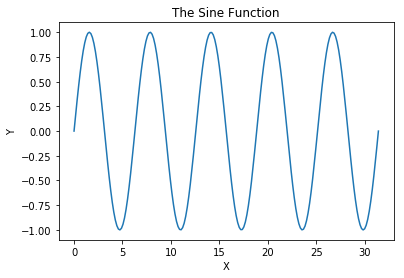

In [6]:
x = np.linspace(0, 10*np.pi, 200)
sinx = np.sin(x)

plt.plot(x, sinx)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The Sine Function')

## Matplotlib Figures are composed of many sub-objects...

  - **Figures** are the actual window that the graphics are inside.
  - **Axes** is what we usually think of as a figure.  It contains the title, labels, lines, markers, tick marks, etc.

To modify your figures, you will inevitably need to figure out which object needs to be modified.
  

## Making Subplots

Text(0.5,1,'Cosine of X')

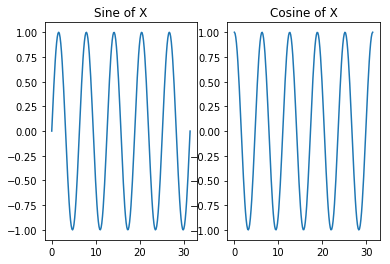

In [7]:
cosx = np.cos(x)

fig = plt.figure(1)
ax = plt.subplot(1, 2, 1)
ax.plot(x, sinx)
ax.set_title('Sine of X')

ax = plt.subplot(1, 2, 2)
ax.plot(x, cosx)
plt.title('Cosine of X')

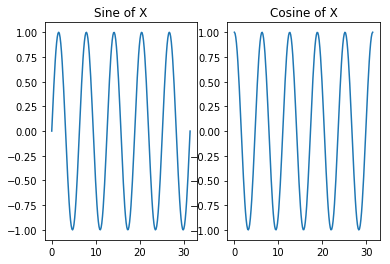

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax, data, title in zip(axes, [sinx, cosx], ['Sine', 'Cosine']):
    ax.plot(x, data)
    ax.set_title('{} of X'.format(title))


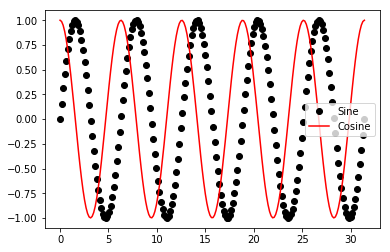

In [9]:
fig, ax = plt.subplots()
ax.plot(x, sinx, 'ko', label='Sine')
ax.plot(x, cosx, 'r', label='Cosine')
plt.legend()

Plot a histogram of random samples from a normal distribution.

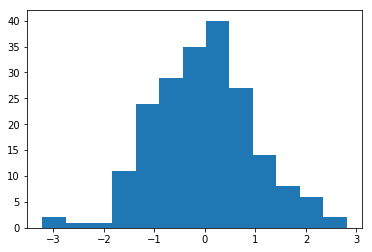

In [16]:
random_data = np.random.randn(200)
hg = plt.hist(random_data, bins=13)

# Conclusions

You've learned how to create your own classes, used Numpy to do some basic arithmetic and Matplotlib to plot some simple functions. During the exercise courses, you will apply your knowledge by performing calculations and creating some basic plots.